In [0]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer
from pyspark.sql.functions import udf, col, expr, sum
from pyspark.sql.functions import col, when
from pyspark.sql.functions import col, to_date
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.ml.feature import Tokenizer
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType, StringType

In [0]:
%sh pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.1/774.1 kB 19.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [0]:
pip install --upgrade pip

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
!wget https://proai-datasets.s3.eu-west-3.amazonaws.com/bitcoin_tweets.csv

--2024-04-30 08:09:51--  https://proai-datasets.s3.eu-west-3.amazonaws.com/bitcoin_tweets.csv
Resolving proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)... 16.12.18.22, 52.95.154.86
Connecting to proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)|16.12.18.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1741409971 (1.6G) [text/csv]
Saving to: ‘bitcoin_tweets.csv’

bitcoin_tweets.csv  100%[===================>]   1.62G  12.6MB/s    in 1m 57s  

2024-04-30 08:11:48 (14.2 MB/s) - ‘bitcoin_tweets.csv’ saved [1741409971/1741409971]



In [0]:
# Creation of Spark session

spark = SparkSession.builder.getOrCreate()

# Importing data into the Pandas DataFrame"
dataset = pd.read_csv("/databricks/driver/bitcoin_tweets.csv", delimiter=";",low_memory=False)

# Creation of the Spark DataFrame
spark_df = spark.createDataFrame(dataset)

#Data cleaning
# Deletion of null rows and rows with None value in the 'text' column
spark_df = spark_df.na.drop(how="all")
spark_df = spark_df.na.drop(subset=["text"])
spark_df = spark_df.fillna({"text": "N/A", "likes": 0, "replies": 0})



In [0]:
display(spark_df)

Unnamed: 0 id user fullname url timestamp replies likes retweets text 0 1132977055300300800 KamdemAbdiel Abdiel kamdem null 2019-05-27 11:49:14+00 0.0 0.0 0.0 È appena uscito un nuovo video! LES CRYPTOMONNAIES QUI PULVÉRISENT BITCOIN EN 2019 https://t.co/yCsQMvRnyS 1 1132977073402736640 bitcointe Bitcointe null 2019-05-27 11:49:18+00 0.0 0.0 0.0 Cardano: Digitize Currencies; EOS https://t.co/1kTKqKEBlS 6500% ROI; AT&T Bitcoin Bill Pay https://t.co/eQCwOXKHK0 | Cardano (ADA) 🌏📢😎🤑💵 | #FolloForFolloBack #follo4folloback #followforfollow #bitcointe #cryptocurrency 2 1132977023893139456 3eyedbran Bran - 3 Eyed Raven null 2019-05-27 11:49:06+00 0.0 2.0 1.0 Another Test tweet that wasn't caught in the stream ! bitcoin 3 1132977089089556481 DetroitCrypto J. Scardina null 2019-05-27 11:49:22+00 0.0 0.0 0.0 Current Crypto Prices! 

BTC: $8721.99 USD
ETH: $266.62 USD
LTC: $114.03 USD
BCH: $432.02 USD
XLM: $0.133 USD
DOGE: $ 0.00314 USD
NEO: $12.04 USD
XRP: $0.4092 USD
CANN: $0.001482 USD
EMC2: $0.1198 USD
XMR: $94.65 USD
BTG: $24.31 USD 4 1132977092340191232 mmursaleen72 Muhammad Mursaleen null 2019-05-27 11:49:23+00 0.0 0.0 0.0 Spiv (Nosar Baz): BITCOIN Is An Asset & NOT A Currency.

https://t.co/FJru1ooxSM

https://t.co/fYBX4H6r6r

https://t.co/xZSjmZ0h3K

https://t.co/v7GRFIQG7w

https://t.co/Oq5hQt5hNn 5 1132977100309319680 0nurTOKA 🐻🔫💥🐂🚀🙏 null 2019-05-27 11:49:25+00 0.0 0.0 0.0 #btc inceldiği yerden kopsun bakalım 17:00 ye kadar bir hareket bekliyorum, yukarı yönlü olur umarın sanırım inşallah yani 😁 https://t.co/pIMyKfNtc8 6 1132977101638897665 evilrobotted evilrobotted null 2019-05-27 11:49:25+00 0.0 0.0 0.0 @nwoodfine We have been building on the real #bitcoin SV.

What have you been building on broken BTC? 7 1132977108836323330 jabur_guilherme Guilherme Jabur null 2019-05-27 11:49:27+00 0.0 0.0 0.0 @pedronauck como investidor, vc é um ótimo dev. Sorte q eu comprei os BTC, subiu a poha toda :o 8 1132977131850350593 INTBICON 億り人彼氏 null 2019-05-27 11:49:32+00 0.0 0.0 0.0 ブラジルはまぁ置いといてもドイツは存在感出してくるのかな。ロシアもマイニングなどで元気になるかと思ったらそこまででしたね。
https://t.co/gcAh2HrlW6 9 1132977132714561536 MLWright15 ML Wright null 2019-05-27 11:49:32+00 0.0 0.0 0.0 CHANGE IS COMING...GET READY!!! Boom, Another [CB] Jab, Nothing Can Stop This! Globalism at its end stage, [CB] push to make a one world govt. coming to an end. 

The People Are Taking the Lead, & Leaders Will Have to Follow the Majority!!!

WWG1WGQ!!!

https://t.co/tAjFwxnWD4 10 1132977076921933825 ltonews LTONEWS null 2019-05-27 11:49:19+00 0.0 14.0 2.0 One of the useful articles of Stefan; here is the guide, you can run a @LTOnetwork node on Alibaba Cloud.

https://t.co/iJ9rlkaabt

#ltonetwork $lto
#Eth #xrpcommmunity #crypto #xlm
#xrp #blockchain #xrpcommmunity #eos #xmr #trx #ltc #enjin #ethereum #bitcoin 11 1130878355375501313 giving_airdrops Daily_Airdrops null 2019-05-21 16:49:45+00 47.0 81.0 84.0 BTC IS STILL GOING STRONG!!

Thus, we are giving away 0.04 BTC and 10 BNB to 2 lucky winners!

GIVEAWAY doubles at 250 RT! 

To enter:
Follow us 
Subscribe https://t.co/XDmlTtX3ie 
RT

#airdrop #bitcoin #ico #cryptocurrency 
#xrp #ETH #TRX #Binance
#ethereum #btc #crypto #bounty https://t.co/pbCOQu3Uzo 12 1131208662423355393 Cybintelligence CybIntelligence null 2019-05-22 12:42:16+00 3.0 2.0 7.0 BestMixer has been seized by the Dutch Police / Luxembourg Police and French Police w/ association from Europol. BestMixer was a Bitcoin Mixer/Tumbler. #Cryptocurrency #Bitcoin #BestMixer https://t.co/dXrEY9yAtt 13 1132977122102980608 optbus_hw45 Optimized Business null 2019-05-27 11:49:30+00 1.0 1.0 1.0 Invested my Life Savings into Bitcoin and Ethereum | Vlog #09 https://t.co/CEL0BXw3fs https://t.co/AET16t8a56 14 1132922663113023489 CCNMarkets CCN.com null 2019-05-27 08:13:06+00 5.0 167.0 68.0 Bitcoin Price Hits $8,939 in New 2019 High: What’s Driving the Hypnotic Rally? https://t.co/BADC8cBQdd 15 1126881083314835457 mickad666 micka null 2019-05-10 14:06:01+00 0.0 0.0 0.0 share 16 1132977068948348928 coin

In [0]:
# Sentiment analysis


from textblob import TextBlob


# Definition of the UDF (User Defined Function) for sentiment analysis using TextBlob
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"



# Registration of the UDF function
sentiment_udf = udf(lambda x: get_sentiment(x), StringType())

# Application of the UDF to obtain the sentiment"
spark_df = spark_df.withColumn("sentiment_label", sentiment_udf(spark_df["text"]))

# Show the dataframe with a new column "sentiment_label"
#display(spark_df)

In [0]:


# Creation of the 'sentiment_binary' column with a value of 0 for neutral sentiment, 1 for positive, and -1 for negative.
spark_df = spark_df.withColumn("sentiment_binary", 
                                when(col("sentiment_label") == "neutral", 0)
                                .when(col("sentiment_label") == "positive", 1)
                                .when(col("sentiment_label") == "negative", -1))

# Creation of the 'date' column containing only dates from the 'timestamp' column.
spark_df = spark_df.withColumn("date", col("timestamp").cast("date"))


#display(spark_df.select("sentiment_binary", "date"))

In [0]:


# Filtering tweets based on sentiment
filtered_df = spark_df.filter((col("sentiment_label") == "positive") | (col("sentiment_label") == "negative"))

# Aggregation of tweets by day.
aggregated_df = filtered_df.groupBy(to_date("date").alias("date")).agg({"sentiment_binary": "mean"})

# Filter the DataFrame to include only positive tweets (sentiment_binary == 1) and negative tweets (sentiment_binary == -1).
positive_negative_df = filtered_df.filter((col("sentiment_binary") == 1) | (col("sentiment_binary") == -1))

# Calculate the sentiment for each positive or negative tweet.
positive_negative_df = positive_negative_df.withColumn("sentiment_score", sentiment_udf(positive_negative_df["text"]))

#Group by date and calculate the average sentiment.
df_sentiment = positive_negative_df.select("sentiment_score", to_date("date").alias("date")) \
                                   .groupBy("date") \
                                   .agg({"sentiment_score": "mean"}) \
                                   .withColumnRenamed("avg(sentiment_score)", "avg_sentiment")



In [0]:
# Analysis of the number of likes related to positive, neutral, and negative tweets.


# Calculate the sum of likes for each type of sentiment.

df_likes = spark_df.select("sentiment_binary", "likes")
df_likes = df_likes.groupBy("sentiment_binary").agg(F.sum("likes").alias("likes_sum"))

In [0]:
# List of sentiment labels.
labels = df_likes.select("sentiment_binary").rdd.flatMap(lambda x: x).collect()



In [0]:
# List of sums of likes for each type of sentiment.
sizes = df_likes.select("likes_sum").rdd.flatMap(lambda x: x).collect()

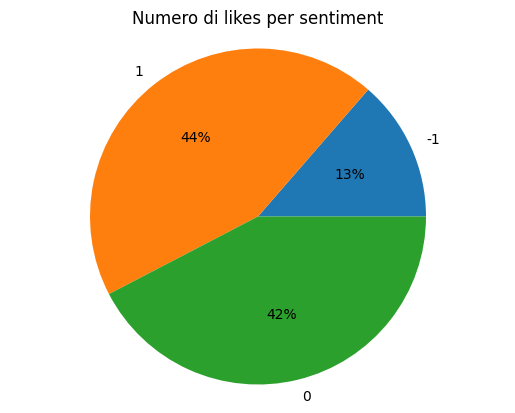

In [0]:
# Pie chart of the sum of likes for each type of sentiment.

plt.pie(sizes, labels=labels, autopct='%d%%')
plt.axis("equal")
plt.title("Numero di likes per sentiment")
plt.grid()
plt.show()


*The pie chart shows the distribution of "likes" by sentiment across three categories: -1, 0, and 1.*
*Sentiment -1: This category, represented in orange, accounts for 44% of the "likes" and likely indicates a negative reaction.*
*Sentiment 0: The blue category, comprising 13% of the "likes", corresponds to a neutral or indifferent reaction.*
*Sentiment 1: Finally, the green category, making up 43% of the "likes", represents a positive reaction.*

In [0]:
# Analysis of the number of replies related to positive, neutral, and negative tweets.
# Calculate the sum of replies for each type of sentiment.

df_replies = spark_df.select("sentiment_binary", "replies")
df_replies = df_replies.groupBy("sentiment_binary").agg(F.sum("replies").alias("replies_sum"))



In [0]:


# Convert the Spark DataFrame to a temporary Pandas DataFrame to speed up processing.
df_replies_pandas = df_replies.toPandas()

# Extract the sentiment labels and the sums of replies.
labels = df_replies_pandas["sentiment_binary"].tolist()
sizes = df_replies_pandas["replies_sum"].tolist()


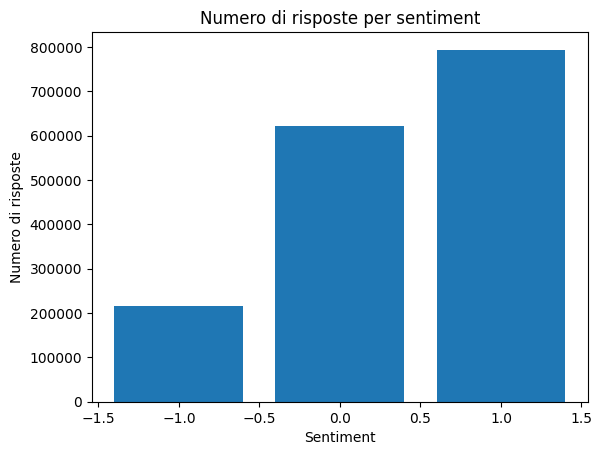

In [0]:
# Bar chart of the sum of replies for each type of sentiment.
plt.bar(labels, sizes)
plt.xlabel("Sentiment")
plt.ylabel("Numero di risposte")
plt.title("Numero di risposte per sentiment")
plt.show()


*The bar graph shows the distribution of the number of responses based on their sentiment, classified as positive, negative or neutral.
Y-axis: Shows the number of responses for each feeling type.
Bars: The length of each bar represents the number of responses associated with the corresponding sentiment.
The number of positive responses is significantly higher than that of negative and neutral responses.
The distribution of responses is asymmetric, with a concentration of positive responses and a tail of negative responses.
The number of neutral responses is the lowest among the three categories.*

In [0]:
# Analysis of the trend of positive, neutral, and negative tweets over time.
# Group the data by date and calculate the average sentiment for each day.
df_sentiment = spark_df.groupBy("date").agg(F.avg("sentiment_binary").alias("avg_sentiment"))




In [0]:
# Extract the dates and the average sentiment values.
dates = df_sentiment.select("date").rdd.flatMap(lambda x: x).collect()
sentiments = df_sentiment.select("avg_sentiment").rdd.flatMap(lambda x: x).collect()


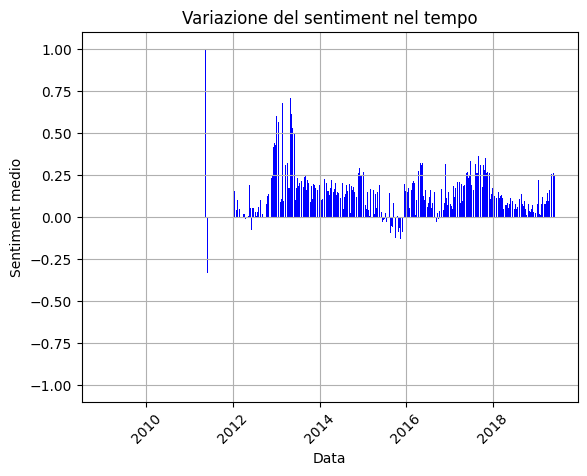

In [0]:
# Create the bar chart for the sentiment change over time.
plt.bar(dates, sentiments, color='blue')
plt.xlabel("Data")
plt.ylabel("Sentiment medio")
plt.title("Variazione del sentiment nel tempo")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


*The graph represents the "Sentiment Change Over Time". It's a bar chart showing how sentiment changes over time. The blue bars indicate sentiment values at different time points, with the Y-axis ranging from -1.0 to 1.0, where -1.0 represents a very negative sentiment and 1.0 represents a very positive sentiment. The X-axis represents different points in time, although specific time intervals or dates are not visible in the image. This type of graph visualizes trends and fluctuations in sentiment in response to specific events or over time, each bar represents the average sentiment value on a specific day.*

In [0]:
w